In [190]:
import numpy as np
import pandas as pd

In [212]:
df=pd.read_csv('ml_resume_dataset_4500.csv')

In [213]:
df.shape

(4500, 9)

In [214]:
df.head()

,id,name,years_experience,highest_degree,skills,current_title,has_portfolio,raw_text,label
0,1,Badhan Shah,9.0,Bachelors,"NLP, GPT",Customer Support,False,Sales professional with strong communication s...,0
1,2,Lamia Sarker,2.0,Masters,"PyTorch, CI/CD, Power BI, Data Visualization, AWS",Administrative Assistant,False,Sales professional with strong communication s...,0
2,3,Badhan Molla,2.0,Bachelors,"AWS, Flask, Machine Learning, Model Deployment...",Computer Vision Engineer,True,Research scientist with strong statistical bac...,1
3,4,Badhan Ahmed,9.0,Bachelors,"Hadoop, Feature Engineering, Docker Compose, O...",Data Entry Operator,True,Customer support representative with some Exce...,0
4,5,Rasel Siddiqui,10.0,Bachelors,"Speech Recognition, Tableau, Azure, TensorFlow",Customer Support,False,Content creator interested in data science but...,0


In [215]:
df.isnull().sum()

id                  0
name                0
years_experience    0
highest_degree      0
skills              0
current_title       0
has_portfolio       0
raw_text            0
label               0
dtype: int64

In [216]:
df['label'].value_counts()

label
0    3150
1    1350
Name: count, dtype: int64

In [217]:
df['skill_count'] = df['skills'].apply(lambda x: len(x.split(', ')))

In [218]:
df.sample()

,id,name,years_experience,highest_degree,skills,current_title,has_portfolio,raw_text,label,skill_count
3445,3446,Nusrat Raihan,3.0,Bachelors,"Feature Engineering, GPT, Model Deployment, Nu...",Research Scientist,False,Experienced ML engineer with strong background...,1,9


In [219]:
df.describe()

,id,years_experience,label,skill_count
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,2250.500000,4.437778,0.300000,6.095778
std,1299.182435,3.653459,0.458308,3.608100
min,1.000000,0.000000,0.000000,2.000000
25%,1125.750000,1.000000,0.000000,3.000000
50%,2250.500000,4.000000,0.000000,5.000000
75%,3375.250000,7.000000,1.000000,8.000000
max,4500.000000,15.000000,1.000000,15.000000


In [220]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['degree_encoded']=le.fit_transform(df['highest_degree'])
df['has_portfolio'] = df['has_portfolio'].astype(int)

In [221]:
df.sample(3)

,id,name,years_experience,highest_degree,skills,current_title,has_portfolio,raw_text,label,skill_count,degree_encoded
4153,4154,Sumaiya Kabir,2.0,Bachelors,"XGBoost, Machine Learning, Hadoop, Time Series...",Office Assistant,0,Entry-level candidate familiar with MS Excel a...,0,6,0
2577,2578,Anika Kabir,1.0,Bachelors,"Regression, Power BI, TensorFlow",Administrative Assistant,0,Office assistant with administrative experienc...,0,3,0
1883,1884,Rasel Ghosh,5.0,Bachelors,"FastAPI, Python, SQLAlchemy, HuggingFace, JSON...",Sales Executive,0,Office assistant with administrative experienc...,0,6,0


In [222]:

df['current_title_clean'] = df['current_title'].fillna('None')
ml_titles = ['Data Scientist', 'ML Engineer', 'Machine Learning Engineer', 
             'AI Researcher', 'Research Scientist', 'NLP Engineer', 
             'Computer Vision Engineer', 'Data Analyst', 'Applied ML Engineer']
df['is_ml_title'] = df['current_title'].apply(
    lambda x: 1 if x in ml_titles else 0
)

In [223]:
df.shape

(4500, 13)

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer(max_features=50)
skills_tfid=tfid.fit_transform(df['skills'])
skills_df=pd.DataFrame(skills_tfid.toarray(), columns=tfid.get_feature_names_out())

In [227]:
all_skills = set()
for s in df['skills']:
    all_skills.update(s.split(', '))
print(f"Total unique skills: {len(all_skills)}")

Total unique skills: 53


,apis,aws,azure,bi,cd,ci,classification,clustering,compose,data,...,series,spark,speech,sql,sqlalchemy,statistics,streamlit,tableau,time,transformer
4325,0.371558,0.0,0.000000,0.000000,0.0,0.0,0.371807,0.0,0.0,0.0,...,0.0,0.0,0.365032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1244,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1189,0.000000,0.0,0.399591,0.410997,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
X = pd.concat([
    df[['years_experience', 'degree_encoded', 'has_portfolio', 'is_ml_title']].reset_index(drop=True),
    skills_df
], axis=1)
y=df['label']

In [231]:
X.shape

(4500, 54)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

Accuracy: 99.89%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00       258

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



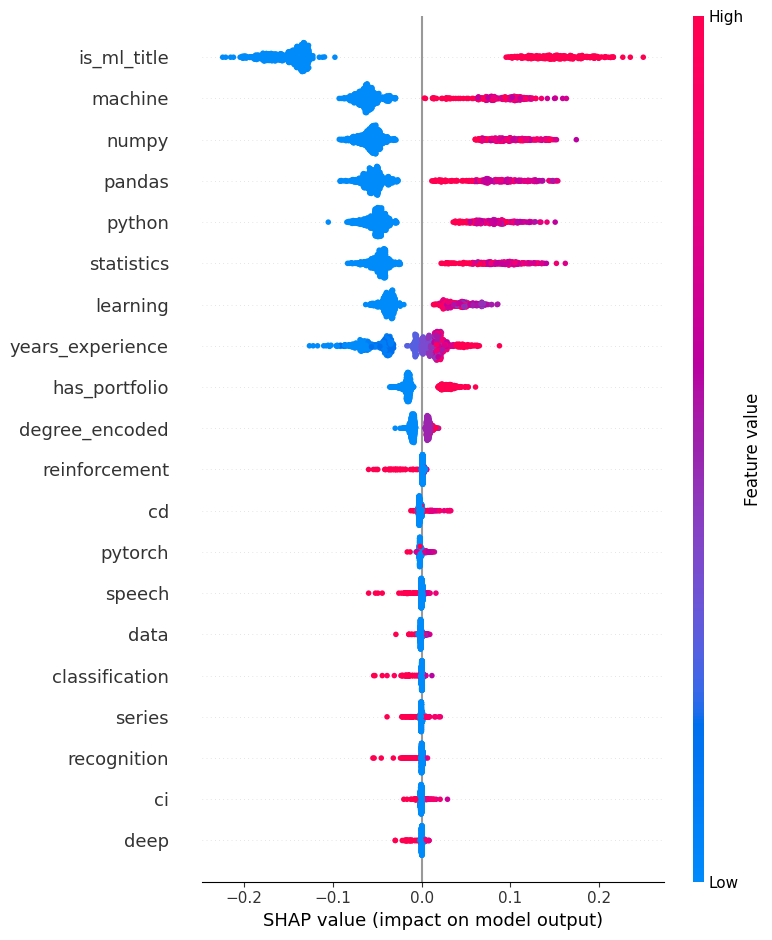

In [234]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test)

In [ ]:
import joblib
joblib.dump(model,'resume_model.pkl')
joblib.dump(tfid,'tfidf_vectorizer.pkl')
joblib.dump(le,'degree_encoder.pkl')

['degree_encoder.pkl']